In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [3]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

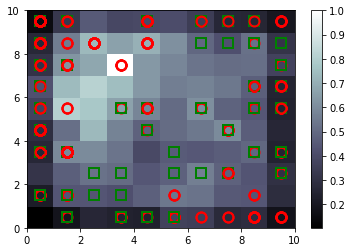

In [4]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [5]:
# Finding the frauds


In [5]:
distances = som.distance_map().T
mappings = som.win_map(X)
frauds = []
 
for yy in range(len(distances)):
  for xx in range(len(distances[yy])):
    if distances[yy, xx] >= 0.98: # 1.0 is white
      frauds.extend(mappings[(xx, yy)])
    
frauds = sc.inverse_transform(frauds)


In [6]:
frauds


array([[1.5706762e+07, 0.0000000e+00, 4.0830000e+01, 3.5000000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 5.0000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.1600000e+03, 1.0000000e+00],
       [1.5651868e+07, 0.0000000e+00, 3.8750000e+01, 1.5000000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 7.6000000e+01, 1.0000000e+00],
       [1.5651460e+07, 0.0000000e+00, 6.9500000e+01, 6.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5672637e+07, 0.0000000e+00, 3.6750000e+01, 4.7100000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [7]:
#CustomerID
for i in range(len(frauds)):
    print(frauds[i][0])

15706762.0
15651868.0
15651460.0
15672637.0
15636454.0
